# Exploration of New Oil Fields Regions Using ML Models

The purpose of this study is to find the optimal solution for determining the most profitable field with the least probability of loss.

We have data from 100,000 oil samples in three regions, where various characteristics and reserves have been measured. We need to build a machine learning model that will help determine the region where mining will bring the greatest profit. We will analyze the possible profit and risks using the Bootstrap technique.

**Conditions for choosing the region of the oil field**

When exploring a region, we examine 500 points, from which, using machine learning, we select the best 200 for development. The budget for the development of wells in the region is 10 billion rubles. At current prices, one barrel of raw materials brings 450 rubles of income. Highest loss probability 2.5%

## Loading and Preparing Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set(rc={'figure.figsize':(12, 8)}, palette='Set2', font_scale=1.25)
warnings.filterwarnings('ignore')

###  Filling in the constant variables

The cost of one thousand barrels of oil (thousand rubles).

In [2]:
PRICE_PER_BARREL = 450

The budget for the development of the field is 10 billion rubles. Let's convert to thousands. rubles.

In [3]:
BUDGET = 10_000_000

The maximum allowable loss probability: 2.5% for the convenience of calculations, we will immediately indicate in shares.

In [4]:
MAX_LOSS = 0.025

Number of investigated wells.

In [5]:
RESEARCH_WELLS_NUM = 500

Number of wells selected for production.

In [6]:
BEST_WELLS_NUM = 200

Random State

In [7]:
RS = 23

### Data loading

In [8]:
# Loading data for all 3 regions
data_reg0 = pd.read_csv('datasets/geo_data_0.csv')
data_reg1 = pd.read_csv('datasets/geo_data_1.csv')
data_reg2 = pd.read_csv('datasets/geo_data_2.csv')

###  EDA

Consider the tables for all three regions

In [9]:
data_reg0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_reg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
data_reg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


All three regions have the same amount of data. No missing values were found in the data.

In [12]:
data_reg0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [13]:
data_reg1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
data_reg2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


The data distributions are noticeably different. We construct distribution graphs for all features.

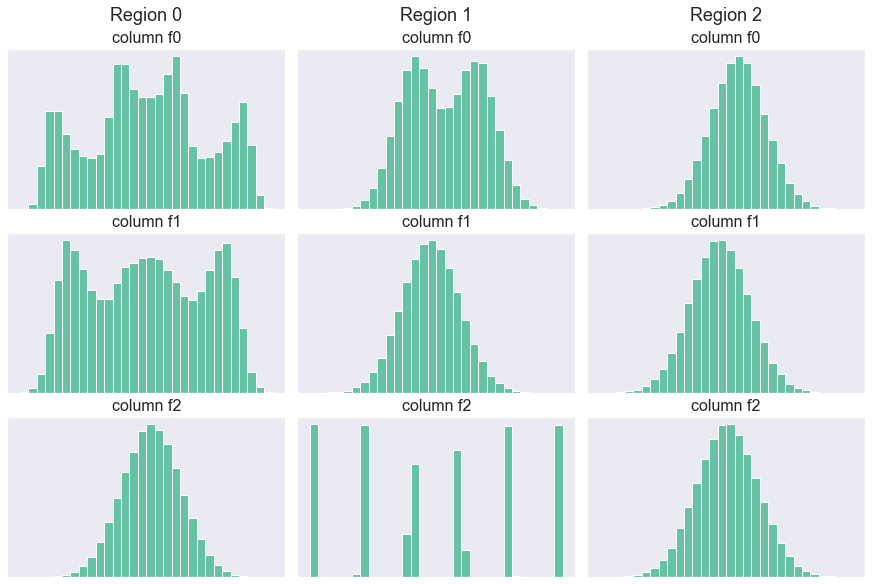

In [15]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
subfigs = fig.subfigures(1, 3)
data = [data_reg0, data_reg1, data_reg2]

for outerind, (subfig, data_reg) in enumerate(zip(subfigs.flat, data), start=0):
    subfig.suptitle(f'Region {outerind}')
    axs = subfig.subplots(3, 1)
    for ax, col in zip(axs.flat, data_reg.columns[1:-1]):
        ax.hist(data_reg[col], bins=30)
        ax.set_title(f'column {col}', fontsize=16)
        ax.set_xticks([])
        ax.set_yticks([])

plt.show();

And for product

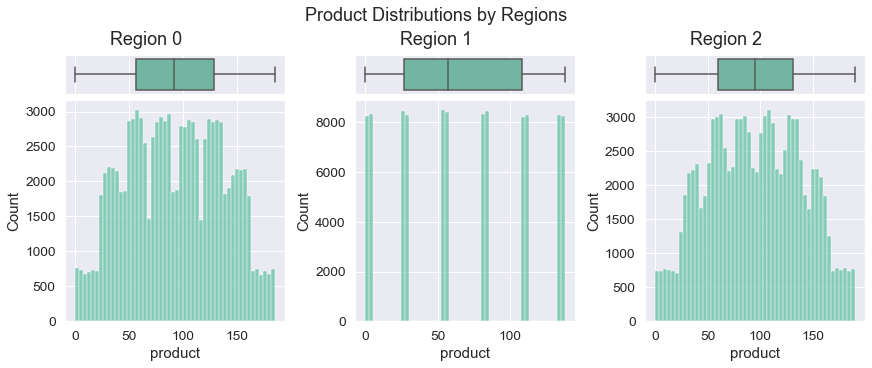

In [16]:
fig = plt.figure(constrained_layout=True, figsize=(12, 5))
subfigs = fig.subfigures(1, 3)
data = [data_reg0, data_reg1, data_reg2]

for outerind, (subfig, data_reg) in enumerate(zip(subfigs, data), start=0):
    subfig.suptitle(f'Region {outerind}')
    (ax_box, ax_hist) = subfig.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data_reg['product'], ax=ax_box)
    sns.histplot(data=data_reg, x='product', ax=ax_hist, bins=50)
    ax_box.set(xlabel='')

fig.suptitle('Product Distributions by Regions')
plt.show();

The average value for the product in region 0 and region 2 is similar, in region 1 it is much lower. Now lets explore the correlation of features.

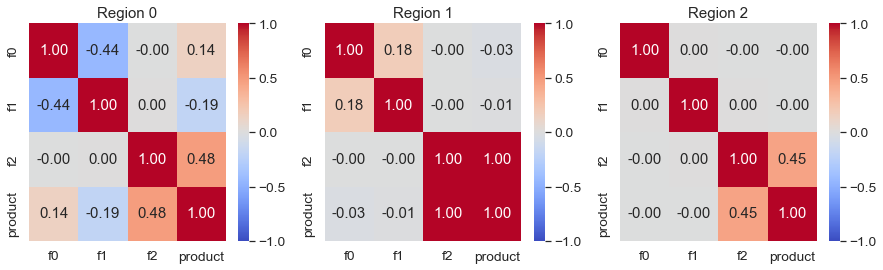

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, data_reg in enumerate(data, start=0):
    sns.heatmap(data_reg.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', ax=ax[i], fmt='.2f')
    ax[i].set_title(f'Region {i}')

In the data for region 0, we can observe a significant correlation between features f0 and f1. The trait f2 correlates with the target trait in all three regions. The strongest correlation of the feature f2 and the target feature in the data for region 1.

#### Check for duplicates

Let's check if all the data has a unique id.

**Region 0**

In [18]:
data_reg0['id'].duplicated().sum()

10

Found 10 records with duplicate id. Let's consider this data further.

In [19]:
duplicated_ids = list(data_reg0.query('id.duplicated()')['id'])

In [20]:
data_reg0.query('id == @duplicated_ids').sort_values(by='id').head(10)

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


**Region 1**

Let's check if all the data has a unique id.

In [21]:
data_reg1['id'].duplicated().sum()

4

Found 4 records id in which duplicated. Let's consider this data further.

In [22]:
duplicated_ids = list(data_reg1.query('id.duplicated()')['id'])

In [23]:
data_reg1.query('id == @duplicated_ids').sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


**Region 2**

In [24]:
data_reg2['id'].duplicated().sum()

4

Let's check if all the data has a unique id.

In [25]:
duplicated_ids = list(data_reg2.query('id.duplicated()')['id'])

In [26]:
data_reg2.query('id == @duplicated_ids').sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


From the data we can see that for the same wells there are different values of signs and volumes of the reserve. Probably, the features and volumes were refined later at different times. We believe that we can leave this data as it is.

Let's remove the non-informative attribute 'id' in all tables.

In [27]:
data_reg0 = data_reg0.drop('id', axis=1)
data_reg1 = data_reg1.drop('id', axis=1)
data_reg2 = data_reg2.drop('id', axis=1)

### Conclusion

Pronounced multicollinearity among the features is not observed. There are no significant outliers in the data. There are no missing data also. All data types are displayed correctly. Non-informative features were removed.

## Train and Validate the ML Model

###  Region 0

#### Functions for training models and displaying results

In [28]:
def get_ml_results(data):
    def data_split(data):
        """
        The function divides the data into training and validation splits.
        Then it extract target and feature values.
        """
        data_train, data_valid = train_test_split(data, test_size=0.25, random_state=RS)
        X_train = data_train.drop('product', axis=1)
        X_valid = data_valid.drop('product', axis=1)
        y_train = data_train['product']
        y_valid = data_valid['product']
        return X_train, y_train, X_valid, y_valid
    
    
    def features_scaling(X_train, X_valid):
        """
        The function produces feature scaling
        """
        scaler = StandardScaler()
        X_train[:] = scaler.fit_transform(X_train)
        X_valid[:] = scaler.transform(X_valid)
        return X_train, X_valid
        
        
    def get_predictions(X_train, y_train, X_valid, y_valid):
        """
        The function trains the model and produces value predictions.
        Returns the average of the predicted values.
        """
        model = LinearRegression()
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)
        predictions = pd.Series(predictions, index=X_valid.index)
        predictions_mean = predictions.mean()
        return predictions, predictions_mean        
    
    
    def ml_show_results(target, predictions):
        """
        The function displays the value of the RMSE metric, 
        as well as the average of the predicted stock
        and the average real volume of stocks.
        The function does not return anything.
        """
        rmse = mean_squared_error(target, predictions, squared=False).round(2)
        target_mean = target.mean()
        predictions_mean = predictions.mean()
        dif = 100 * abs(target_mean - predictions_mean) / target_mean
        print(f'RMSE: {rmse}',
              f'Average predicted field reserve: {round(predictions_mean, 2)}',
              f'Average real reserve: {round(target_mean, 2)}',
              f'The difference between the predicted and actual average volume of reserves is: {round(dif, 2)}%')
    
    X_train, y_train, X_valid, y_valid = data_split(data)
    X_train, X_valid = features_scaling(X_train, X_valid)
    predictions, predictions_mean = get_predictions(X_train, y_train, X_valid, y_valid)
    ml_show_results(y_valid, predictions)
    
    return y_valid, predictions

def ml_results(X_train, y_train, X_valid, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    predictions = pd.Series(predictions, index=X_valid.index)
    predictions_mean = predictions.mean()
    return predictions, predictions_mean

def ml_show_results(target, predictions):
    rmse = mean_squared_error(target, predictions, squared=False).round(2)
    target_mean = target.mean()
    predictions_mean = predictions.mean()
    dif = 100 * abs(target_mean - predictions_mean) / target_mean
    return (f'RMSE: {rmse}',
            f'Average predicted field reserve: {round(predictions_mean, 2)}',
            f'Average real reserve: {round(target_mean, 2)}',
            f'The difference between the predicted and actual average volume of reserves is: {round(dif, 2)}%'
           )

#### Predictions of ML Model

####  Region 0

In [29]:
reg0_reserves_real, reg0_predictions = get_ml_results(data_reg0)

RMSE: 37.92 Average predicted field reserve: 92.82 Average real reserve: 92.45 The difference between the predicted and actual average volume of reserves is: 0.4%


The difference between predicted and actual average stocks in region 0 is less than 1%.

#### Регион 1

In [30]:
reg1_reserves_real, reg1_predictions = get_ml_results(data_reg1)

RMSE: 0.89 Average predicted field reserve: 68.92 Average real reserve: 68.93 The difference between the predicted and actual average volume of reserves is: 0.01%


The difference between predicted and actual average stocks in region 1 is less than 1%.

#### Регион 2

In [31]:
reg2_reserves_real, reg2_predictions = get_ml_results(data_reg2)

RMSE: 40.21 Average predicted field reserve: 95.11 Average real reserve: 95.2 The difference between the predicted and actual average volume of reserves is: 0.1%


The difference between predicted and actual average stocks in region 2 is less than 1%.

### Summary

The models training is complete.

**Region 0**  
RMSE: 37.92  
Average predicted field reserve: 92.82  
Average real reserve: 92.45   
The difference between the predicted and actual average volume of reserves is: 0.4%

**Region 1**  
RMSE: 0.89  
Average predicted field reserve: 68.92  
Average real reserve: 68.93  
The difference between the predicted and actual average volume of reserves is: 0.01%

**Region 2**  
RMSE: 40.21  
Average predicted field reserve: 95.11  
Average real reserve: 95.2  
The difference between the predicted and actual average volume of reserves is: 0.1%

The most accurate predictions with the lowest RMSE value are made by the ML model for region 1.

## Preparing for Profit Evaluation

### Break Even Point Calculation

Let's calculate the sufficient volume of raw materials for the break-even development of a new well. In order to reach the break-even point, it is necessary to extract such an amount of resources, the sale of which will fully cover the costs of developing the field. The average volume can be calculated by dividing the field development budget by the product of the cost of one unit of product and the number of wells.

In [32]:
enough_volume = BUDGET / (PRICE_PER_BARREL * BEST_WELLS_NUM)

In [33]:
enough_volume

111.11111111111111

So, the minimum average production volume is about 111,000 barrels. Let's compare with the average reserve of the deposit in each of the regions. To find out how many wells, on average, you need to develop to reach the breakeven point.

#### Region 0

In [34]:
f'The average reserve of one well in region 0 is {round((100 * data_reg0["product"].mean() / enough_volume), 2)}% of sufficient volume.'

'The average reserve of one well in region 0 is 83.25% of sufficient volume.'

#### Region 1

In [35]:
f'The average reserve of one well in region 1 is {round((100 * data_reg1["product"].mean() / enough_volume), 2)}% of sufficient volume.'

'The average reserve of one well in region 1 is 61.94% of sufficient volume.'

#### Region 2

In [36]:
f'The average reserve of one well in region 2 is {round((100 * data_reg2["product"].mean() / enough_volume), 2)}% of sufficient volume.'

'The average reserve of one well in region 2 is 85.5% of sufficient volume.'

### Conclusion

The average volume of reserves for wells in each of the three regions is less than the estimated sufficient volume and ranges from 85% to 62% of sufficient volume. Thus the average volume of raw materials is less than sufficient volume to break even. The smallest average stock is in region 1, the largest is in region 2.

The average volume of the predicted raw material is calculated based on 25,000 points. 200 points must be selected as a result. As a result, among these wells there may be wells with sufficient and insufficient supply of raw materials.

In order to at least ensure that there are no losses, only the most productive wells should be developed. The "Bootstrap" technique allows to assess the risk of loss in case of random selection of points. Selecting points randomly 1000 times, we consider what % of cases will bring losses.

## Risks and profit calculations

In [37]:
def earnings_calc(wells_target, wells_predicted, budget, wells_num_total=500, wells_num_to_choose=200, price_per_barrel=450):
    '''
    Function for profit calculation. It takes the following parameters as input:
    wells_target - data on the actual volume of reserves
    wells_predicted - predicted stock volumes
    budget - development budget
    wells_num_total - number of wells among which the best selection is made (default value: 500)
    wells_num_to_choose - number of budgeted wells (default value: 200)
    price_per_barrel - price of a barrel of oil (default value: 450)
    Returns the calculated highest profit for the specified number of best wells.
    '''
    chosen_wells = wells_predicted.sort_values(ascending=False)[:wells_num_to_choose]
    revenue = wells_target.loc[chosen_wells.index].sum() * price_per_barrel
    earnings = revenue - budget
    return earnings

In [38]:
state = np.random.RandomState(RS)

In [39]:
def bootstrap_model(target, probabilities, budget, selections_num=1000, samples_num=500, wells_to_choose=200, price_per_barrel=450,random_state=None):
    '''
    Function for bootstrapping the model. It takes the following parameters as input:
    target - data on actual stock volumes
    probabilities - predicted reserves
    budget - development budget
    selections_num - number of selections (default: 1000)
    samples_num number of wells among which the best selection is made (default: 500)
    wells_to_choose - number of budgeted wells (default: 200)
    price_per_barrel - price of a barrel of oil (default: 450)
    random_state - value for the pseudo-random number generator (Default: None)
    '''
    earnings = []
    for _ in range(selections_num):
        target_sub = target.sample(n=samples_num, replace=True, random_state=random_state)
        prob_sub = probabilities[target_sub.index]
        selection_earnings = earnings_calc(target_sub, prob_sub, budget, samples_num, wells_to_choose, price_per_barrel)
        earnings.append(selection_earnings)
    return pd.Series(earnings)

In [40]:
def mean_earnings_loss(earnings):
    '''
    Function for average profit calculation, probability of loss and confidence interval
    '''
    return (f'Average profit of the region: {round((earnings.mean()/1000), 2)} million rubles',
           f'Loss probability in the region {100 * (earnings < 0).sum() / 1000}%',
           f'95% Confidence Interval of Region Profit: from {earnings.quantile(q=0.025).round(2)} to {earnings.quantile(q=0.975).round(2)} million rubles'
           )

### Calculation of average profit and probability of loss

#### Region 0

In [41]:
earnings_reg0 = bootstrap_model(reg0_reserves_real, reg0_predictions, BUDGET, random_state=state)

In [42]:
mean_earnings_loss(earnings_reg0)

('Average profit of the region: 608.24 млн. рублей',
 'Loss probability in the region 2.0%',
 '95% Confidence Interval of Region Profit: from 49480.22 to 1253629.87 million rubles')

#### Region 1

In [43]:
earnings_reg1 = bootstrap_model(reg1_reserves_real, reg1_predictions, BUDGET, random_state=state)

In [44]:
mean_earnings_loss(earnings_reg1)

('Average profit of the region: 695.79 млн. рублей',
 'Loss probability in the region 0.1%',
 '95% Confidence Interval of Region Profit: from 197272.34 to 1261850.48 million rubles')

#### Region 2

In [45]:
earnings_reg2 = bootstrap_model(reg2_reserves_real, reg2_predictions, BUDGET, random_state=state)

In [46]:
mean_earnings_loss(earnings_reg2)

('Average profit of the region: 581.05 млн. рублей',
 'Loss probability in the region 4.1%',
 '95% Confidence Interval of Region Profit: from -56024.03 to 1204241.1 million rubles')

###  Conclusion

Two regions are fit for the conditions of the task - 0 and 1. Region 2 is not suitable, because the probability of losses there  3%. The average profit of region 1 is greater than in region 0, so we choose region 1. The average profit of region 1 is 695.79 million rubles
The probability of losses in the region is 0.1%.
95% confidence interval of the region's profit: from 197272.34 to 1261850.48 million rubles

## Summary

1. During the exploring and preprocessing the data, it was found that there is no pronounced multicollinearity among the features. There are no significant outliers in the data. There are no missing data. All data types are displayed correctly.
Non-informative features were removed.  


2. The models were trained. The most accurate predictions with the lowest RMSE = 0.89 are made by the model for region 1.  


3. The average volume of oil reserves in each of the three regions is less than the estimated sufficient volume and ranges from 85% to 62% of sufficient. The smallest average stock is in region 1, the largest is in region 2.
From the average volume sufficiency data, it was concluded that in order to at least ensure no losses, only the most productive wells should be developed.  


4. After the selection of the best wells and calculations of the average profit and loss probabilities, it was concluded that two regions, 0 and 1, fit the conditions of the problem. Region 2 is not suitable, because he has too high a probability of taking losses: 3%.
The average profit of region 1 is greater than in region 0, so we choose region 1. The average profit of region 1 is 695.79 million rubles
The probability of losses in the region is 0.3%.
95% confidence interval of the region's profit: from 197272.34 to 1261850.48 million rubles.  


Region 1 has the smallest average reserve per well, but since this region was the most accurate prediction, it was the most promising.